In [1]:
import numpy as np
import pandas as pd
from pandas import Series,DataFrame
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from sklearn.datasets import fetch_olivetti_faces

In [3]:
faces = fetch_olivetti_faces()

In [24]:
faces.images[0].shape

(64, 64)

In [25]:
64*64

4096

In [6]:
train = faces.data
target = faces.target

In [12]:
face = train[target == 0]
face.shape

(10, 4096)

In [15]:
len(train[target == 0])

10

In [20]:
X_train = []
X_test = []
y_train = []
y_test = []

for i in range(40):
    person_faces = train[target == i]
    
    for k in range(len(person_faces)):
        face_data = person_faces[k]
        up_face = face_data[:2048]
        bottom_face = face_data[2048:]
        
        if k < 8:
            X_train.append(up_face)
            y_train.append(bottom_face)
        else:
            X_test.append(up_face)
            y_test.append(bottom_face)

In [29]:
from sklearn.neighbors import KNeighborsRegressor

# 分类问题
from sklearn.linear_model import LogisticRegression

In [30]:
knn = KNeighborsRegressor()
knn.fit(X_train,y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=5, p=2,
          weights='uniform')

In [32]:
y_ = knn.predict([X_test[0]])

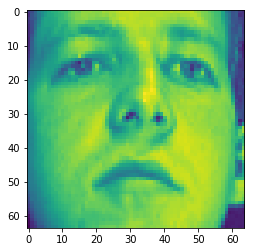

In [39]:
plt.imshow(np.concatenate((X_test[0].reshape(32,64),y_test[0].reshape(32,64))))

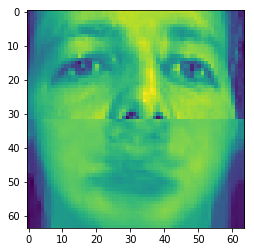

In [40]:
plt.imshow(np.concatenate((X_test[0].reshape(32,64),y_[0].reshape(32,64))))

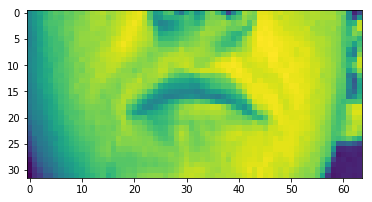

In [38]:
plt.imshow(y_test[0].reshape(32,64))

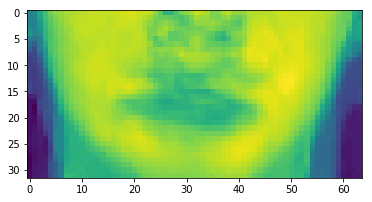

In [36]:
plt.imshow(y_.reshape(32,64))